Non-commercial Use License

Copyright (c) 2021 Siemens Technology

This software, along with associated documentation files (the "Software"), is 
provided for the sole purpose of providing Proof of Concept. Any commercial 
uses of the Software including, but not limited to, the rights to sublicense, 
and/or sell copies of the Software are prohibited and are subject to a 
separate licensing agreement with Siemens. This software may be proprietary 
to Siemens and may be covered by patent and copyright laws. Processes 
controlled by the Software are patent pending.

The above copyright notice and this permission notice shall remain attached 
to the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR 
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE 
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, 
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

In [1]:
import os, sys
THIS_DIR = os.path.abspath('')
PARENT_DIR = os.path.dirname(os.path.abspath(''))
sys.path.append(PARENT_DIR)

import pickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
# rc('text', usetex=True)
rc('pdf', fonttype=42)
rc('ps', fonttype=42)

from datasets.datasets import RigidBodyDataset
from systems.billiards import Billiards, BilliardsDummyAnimation
from pytorch_lightning import seed_everything

import torch
import torch.nn as nn
import json
# from trainer import Model
from trainer_billiards import Model
%matplotlib inline
DPI = 600

In [2]:
FIG_DIR = os.path.join(PARENT_DIR, "figures")

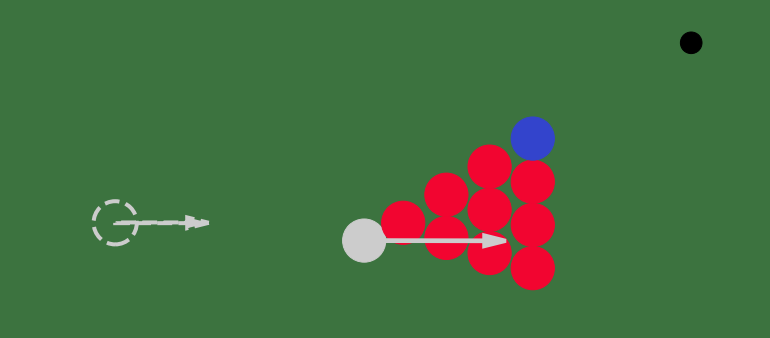

In [3]:
# save difftaichi png
body = Billiards()

# get default initial condition
zs = body.get_initial_conditions() # (1, 2, n, 2)
# modify the initial condition of the first ball into desired ones
zs[0, :, 0, :] = torch.tensor([[0.4458184, 0.47530562],
                                [0.5002306, -0.00089275]])

animator = BilliardsDummyAnimation(zs[0:1, 0, :, :], body, zs[0, 1, 0, 0].item(), zs[0, 1, 0, 1].item())
animator.update()
animator.fig.savefig(os.path.join(FIG_DIR, 'billiards_learned_difftaichi.png'), bbox_inches='tight')

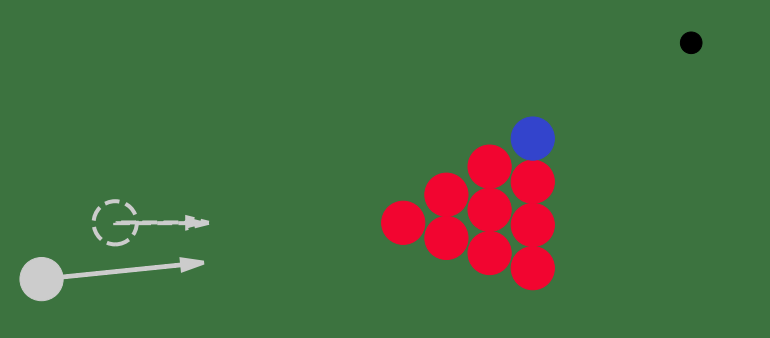

In [4]:
# save our model png
body = Billiards()

# get default initial condition
zs = body.get_initial_conditions() # (1, 2, n, 2)
# modify the initial condition of the first ball into desired ones
zs[0, :, 0, :] = torch.tensor([[-0.0023, 0.4218],
                               [0.5860, 0.0596]])

animator = BilliardsDummyAnimation(zs[0:1, 0, :, :], body, zs[0, 1, 0, 0].item(), zs[0, 1, 0, 1].item())
animator.update()
animator.fig.savefig(os.path.join(FIG_DIR, 'billiards_learned_our_model.png'), bbox_inches='tight')

In [5]:
# plot loss 
with open('history_loss_cuda.pkl', 'rb') as handle:
    difftaichi_loss = pickle.load(handle)

difftaichi_loss = np.stack(difftaichi_loss, axis=0)

In [6]:
checkpoint_path = os.path.join(
    PARENT_DIR,
    "logs",
    "billiards",
    "version_3",
    "last.ckpt"
) 
model = Model.load_from_checkpoint(checkpoint_path)

In [7]:
our_loss = np.stack(model.history_loss, axis=0)

In [8]:
our_loss.shape

(201,)

In [9]:
difftaichi_loss.shape

(200,)

In [10]:
our_loss[0:3]

array([0.        , 0.04547834, 0.02902228])

In [11]:
difftaichi_loss[0:2]

array([0.04541794, 0.02929231], dtype=float32)

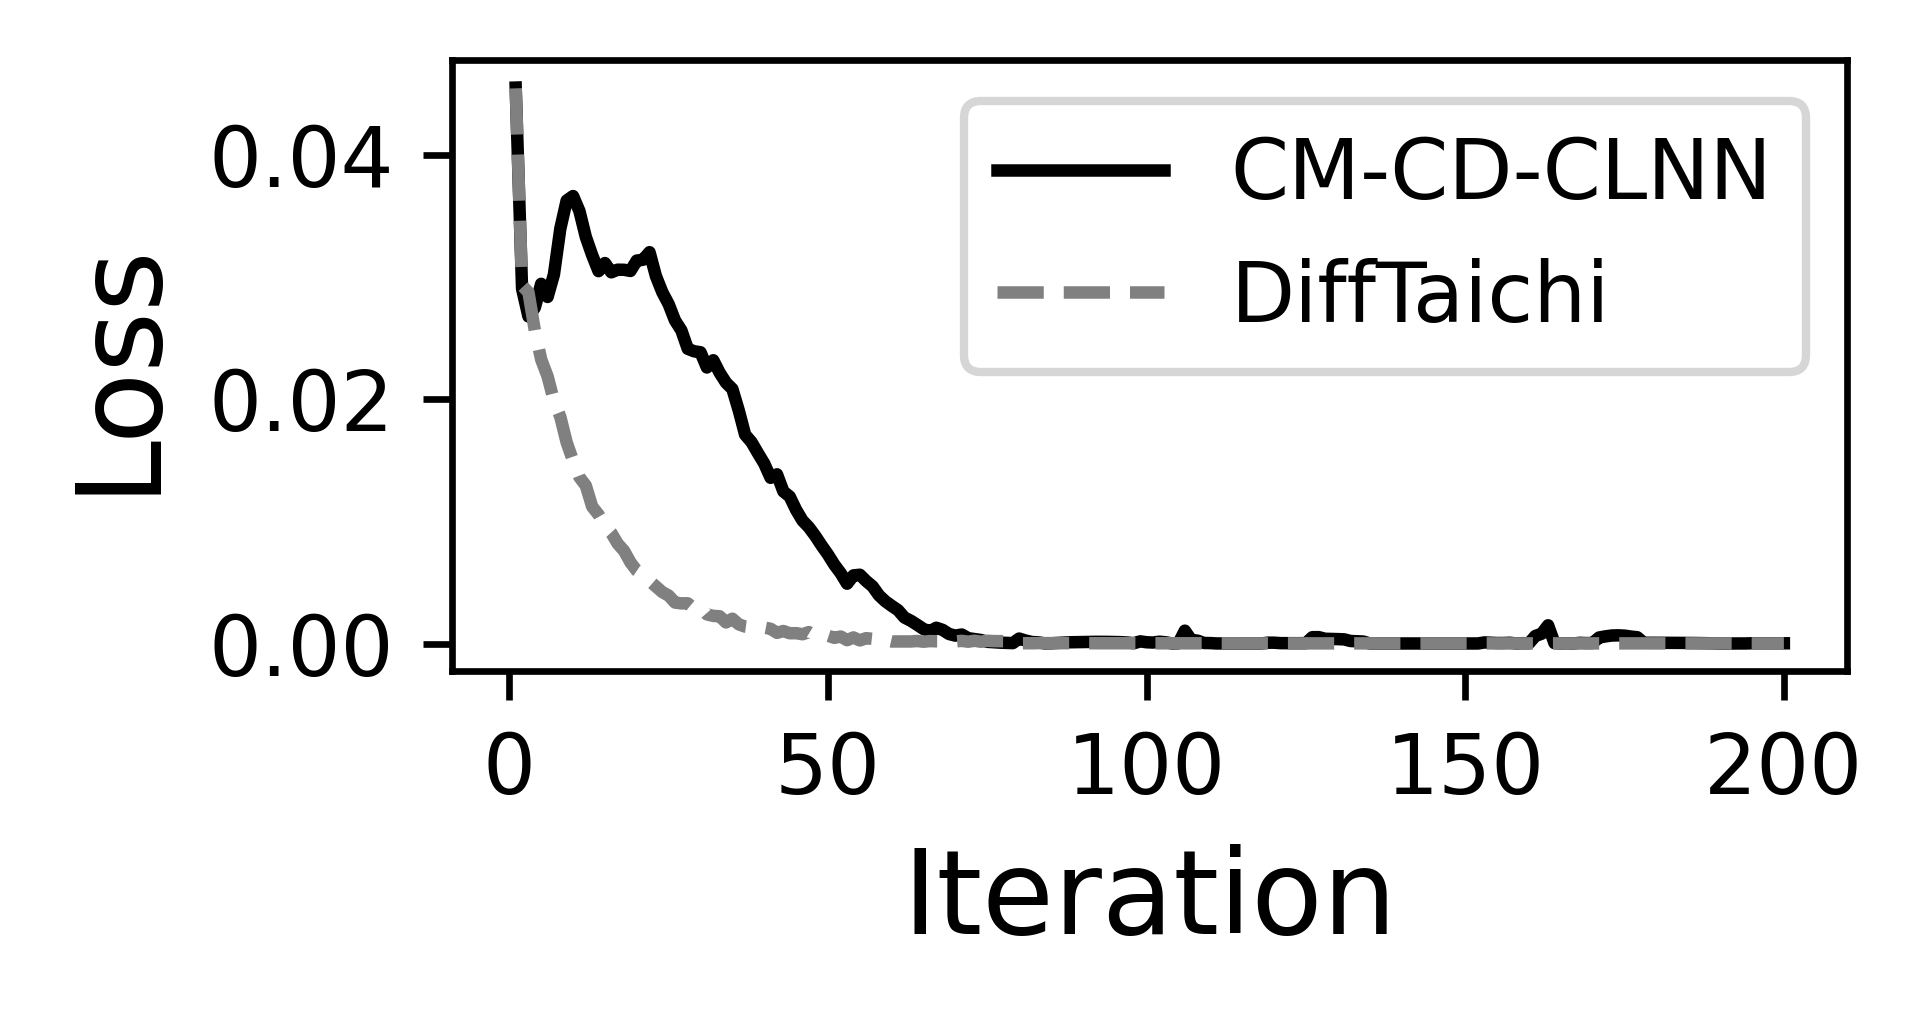

In [13]:
fig, ax = plt.subplots(figsize=(3, 1.35), dpi=DPI)
itr = np.linspace(1, 200, 200)
ax.plot(itr, our_loss[1:], 'k', linestyle="-", label="CM-CD-CLNN")
ax.plot(itr, difftaichi_loss, 'gray', linestyle='--', label="DiffTaichi")
ax.legend(loc=0)
ax.set_ylabel("Loss", fontsize=14)
ax.set_xlabel("Iteration", fontsize=14)
fig.savefig(os.path.join(FIG_DIR, 'billiards_loss'), bbox_inches='tight')